In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
def normal_dist(mu,sigma,size = 1000, n=100000):
    ST = np.random.normal(mu, sigma, n)
    mini = abs(min((ST)))
    for i in range(0,n):
        ST[i] = ST[i] + mini
    count, bins, ignored = plt.hist(ST, 30, density=True)
    plt.xlabel('Time')
    plt.ylabel('prob')
    plt.show()
    return list(ST)[0:size]

In [3]:
def uniform(mu,size = 1000,n=100000):
    Iat = np.random.uniform(0,mu+mu,n)
    count, bins, ignored = plt.hist(Iat, 30, facecolor='blue')
    print("Maximum Count is ",max(count))
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.axis([0, mu+mu, 0, max(count)]) # x_start, x_end, y_start, y_end
    plt.show()
    return list(Iat)[0:size]

Maximum Count is  3424.0


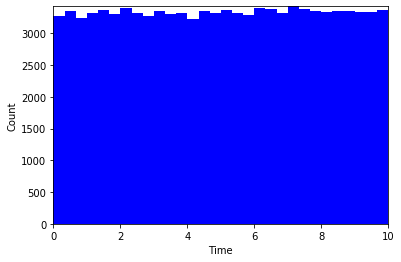

In [49]:
dataset = pd.DataFrame({'Interval Time': uniform(5) }, columns=['Interval Time'])

Maximum Count is  3465.0


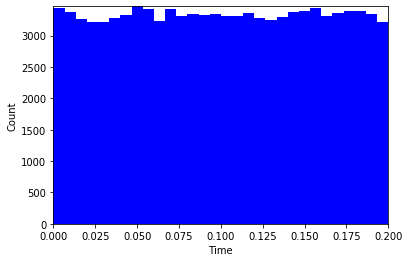

In [50]:
dataset["Arrival Time"] = 0.0
dataset["Waiting Time"] = 0.0 
dataset["Time at Service"] = 0.0
dataset["Service Time"] = uniform(0.1)
dataset["Departure Time"] = 0.0
dataset["Queue Length"] = 0.0

In [6]:
def Arrival_Time(si=1000):
    dataset["Arrival Time"] = 0.0
    Iat_prev = 0.0
    for i in range(0,si):
        dataset["Arrival Time"][i]= dataset["Interval Time"][i] + Iat_prev
        Iat_prev = dataset["Arrival Time"][i]

In [7]:
def DepartureTime(si=1000):
    dataset["Departure Time"] = 0.0
    dataset["Departure Time"][0] =  dataset["Arrival Time"][0] + dataset["Service Time"][0] 
    for i in range(1,si):
        if (dataset["Departure Time"][i - 1] > dataset["Arrival Time"][i]):
            dataset["Departure Time"][i]= dataset["Departure Time"][i - 1] + dataset["Service Time"][i]
        else:
            dataset["Departure Time"][i]= dataset["Arrival Time"][i] + dataset["Service Time"][i]

In [8]:
def TimeatService(si=1000):
    dataset["Time at Service"] = 0.0
    dataset["Time at Service"][0] =  dataset["Arrival Time"][0] 
    for i in range(1,si):
        if dataset["Departure Time"][i - 1] > dataset["Arrival Time"][i]: 
            dataset["Time at Service"][i]= dataset["Departure Time"][i - 1]
        else:
            dataset["Time at Service"][i]= dataset["Arrival Time"][i]
def WaitingTime(si=1000):
    dataset["Waiting Time"] = 0.0 
    for i in range(1,si):
        if dataset["Departure Time"][i - 1] > dataset["Arrival Time"][i]: 
            dataset["Waiting Time"][i] = dataset["Departure Time"][i - 1] - dataset["Arrival Time"][i]
        else:
            dataset["Waiting Time"][i] = 0.0

In [9]:
def QueueLength(si=1000):
    dataset["Queue Length"] = 0
    for i in range(1,si):
        at_i = dataset["Arrival Time"][i]
        for j in range(0,i):
            if(at_i > dataset["Time at Service"][j]):
                continue
            else:
                dataset["Queue Length"][i] = dataset["Queue Length"][i] + 1

In [10]:
def CustomerDisplay(si = 10):
    return dataset.head(si)

In [51]:
Arrival_Time()
DepartureTime()
TimeatService()
WaitingTime()
QueueLength()
CustomerDisplay(10)

KeyError: 'Avg_QL'

In [52]:
dataset["Avg_QL"] = 0.0
dataset["Avg_WT"] = 0.0

In [53]:
def Averagecal(siz = 1000):
    Avgw = 0.0
    Avgq = 0.0
    for i in range(1,siz):
        Avgw= Avgw + dataset["Waiting Time"][i]
        Avgq = Avgq + dataset["Queue Length"][i]
        dataset["Avg_QL"][i] = Avgq/(i + 1)
        dataset["Avg_WT"][i] = Avgw/(i + 1)

In [54]:
Averagecal()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
siz = 1000

In [13]:
util = sum(dataset["Service Time"][0:siz])/(dataset["Departure Time"][siz - 1])
print("Utilization of system is ", (util*100),"%")

Utilization of system is  95.86493615445299 %


In [14]:
AvgQ = sum(dataset["Queue Length"][0:siz])/siz
print("Average Length of Queue is ", int(AvgQ))

Average Length of Queue is  7


In [15]:
AvgN = sum(dataset["Queue Length"][0:siz] + 1)/siz 
print("Average Number in System is  ", int(AvgN))

Average Number in System is   8


In [16]:
AvgW = sum(dataset["Waiting Time"][0:siz])/siz
print("Average Waiting Time is  ", (AvgW),'s')

Average Waiting Time is   37.56532582103634 s


In [17]:
AvgT = sum(dataset["Departure Time"][0:siz] - dataset["Arrival Time"][0:siz])/siz
print("Average Time in System is  ", (AvgT),'s')

Average Time in System is   42.40676537775364 s


In [26]:
def Prob(co,max_len = 150):
    max_time = int(dataset["Departure Time"][max_len]) + 1
    T = 0
    start_time = int(min(dataset["Arrival Time"]))
    #print(max_time)
    count = 0
    ini = 0
    step_size = int(min(dataset["Service Time"])) + 1
    #print(step_size)
    for i in range(start_time,max_time,step_size):
        count = 0
        for j in range(ini,max_len):
            if (dataset.iloc[j]["Arrival Time"] > i):
                break
            elif(dataset.iloc[j]["Departure Time"] <= i):
                ini = j
                continue
            elif(int(dataset.iloc[j]["Arrival Time"]) <= i and  int(dataset.iloc[j]["Departure Time"]) > i):
                count+=1
        if(count == co):
            T +=1
    print("Occurrances :",T)
    return T/max_time

In [24]:
print("Probability of 0 customer in a system of ",150, " is ",Prob(0,150))

Occurrances : 3
Probability of 0 customer in a system of  150  is  0.0004622496147919877


In [25]:
print("Probability of 1 customer in a system of ",150, " is ",Prob(1,150))

Occurrances : 4
Probability of 1 customer in a system of  150  is  0.0006163328197226503


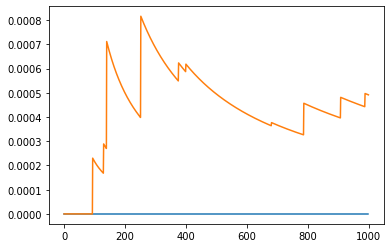

In [55]:
plt.plot(dataset.index,dataset["Avg_QL"])
plt.plot(dataset.index,dataset["Avg_WT"])

Maximum Count is  3404.0


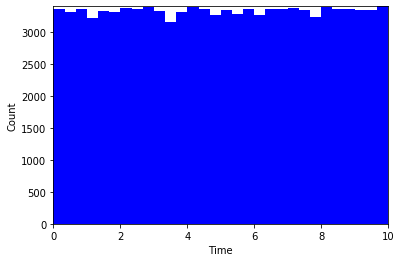

In [34]:
dataset = pd.DataFrame({'Interval Time': uniform(5) }, columns=['Interval Time'])

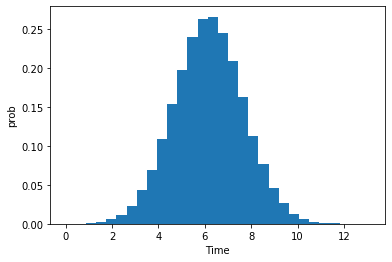

In [35]:
dataset["Arrival Time"] = 0.0
dataset["Waiting Time"] = 0.0 
dataset["Time at Service"] = 0.0
dataset["Service Time"] = normal_dist(5,1.5)
dataset["Departure Time"] = 0.0
dataset["Queue Length"] = 0.0
dataset["Avg_QL"] = 0.0
dataset["Avg_WT"] = 0.0

In [36]:
Arrival_Time()
DepartureTime()
TimeatService()
WaitingTime()
QueueLength()
CustomerDisplay(10)
Averagecal()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


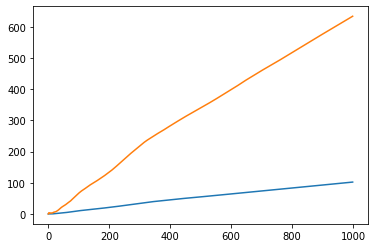

In [37]:
plt.plot(dataset.index,dataset["Avg_QL"])
plt.plot(dataset.index,dataset["Avg_WT"])

Maximum Count is  3523.0


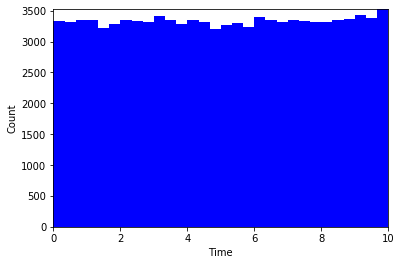

In [38]:
dataset = pd.DataFrame({'Interval Time': uniform(5) }, columns=['Interval Time'])

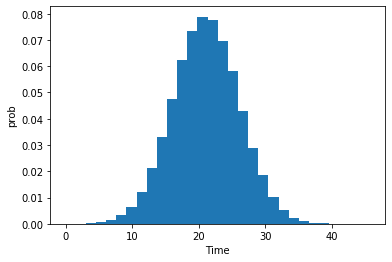

In [40]:
dataset["Arrival Time"] = 0.0
dataset["Waiting Time"] = 0.0 
dataset["Time at Service"] = 0.0
dataset["Service Time"] = normal_dist(5,5)
dataset["Departure Time"] = 0.0
dataset["Queue Length"] = 0.0
dataset["Avg_QL"] = 0.0
dataset["Avg_WT"] = 0.0

In [41]:
Arrival_Time()
DepartureTime()
TimeatService()
WaitingTime()
QueueLength()
CustomerDisplay(10)
Averagecal()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


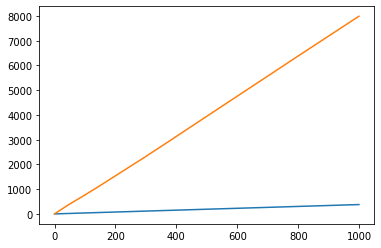

In [42]:
plt.plot(dataset.index,dataset["Avg_QL"])
plt.plot(dataset.index,dataset["Avg_WT"])